<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from math import ceil

In [2]:
data=pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns = None
display (data.head())
data.info()
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Первое, с чем я столкнулась при изучении это то, что данные были отделены друг от дураг наклонной чертой. Исправила это.
Пропущенные значения есть в столбцах 'ceiling_height', 'living_area',  'is_apartment, 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. Некоторые форматы не соотверствуют типу данных. 

## Предобработка данных

In [3]:
#Избавляюсь от пропусков данных:
data['balcony']=data['balcony'].fillna(0)
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['floors_total']=data['floors_total'].fillna(1)
data['is_apartment']=data['is_apartment'].fillna(False)

display(data.isnull().sum()) #убедилась, что пропуски заполнены

#Замена типа данных:
data['floors_total']=data['floors_total'].astype('int')
data['is_apartment']=data['is_apartment'].astype('bool')
data['balcony']=data['balcony'].astype('int') 

data.info() #проверка, что замена произведена

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int32  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропущенные значения в столбцах "balcony", "parks_around3000", "ponds_around3000"  заполнила нулями, т.к. предполагаю, что их нет, иначе бы сведения были представлены. Пропущенные значения в столбце "floors_total" заполнила единицами, т.к. предположила, что у одноэтажных домов не заполнили данное значение, "is_apartment" заполнила заполнила значениями False исходя из предположения, что апартоментов не так и много. Другие пропуски не стала заполнять, т.к. средние или медианные значения могут существенно изменить картину. Также я заметила, что не заполнено одинаковое значение строк в столбцах "парков в радиусе 3 км" и "водоемов в радиусе 3 км". Вероятно, ошибка выгрузки.
Заметила тип данных в столбцах, где это необходимо и возможно.


## Расчёты и добавление результатов в таблицу

In [4]:
#расчет стоимости квадратного метра жилья:
data['price_per_metr']=data['last_price']/data['total_area']

#дата публикации:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#определение этажа:
def floor_in_house (row_values):
    last_floor=row_values['floors_total']
    if row_values['floor']==1:
        return 'первый'
    if row_values['floor'] == last_floor:
        return 'последний'
    return 'другой'
data['floor_type']=data.apply(floor_in_house, axis=1)

#отношение жилой и общей площади:
data['liv_total']=data['living_area']/data['total_area']

#отношение площади кухник к общей:
data['kit_total']= data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,floor_type,liv_total,kit_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,другой,0.320000,0.410000


## Исследовательский анализ данных

**1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков.**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

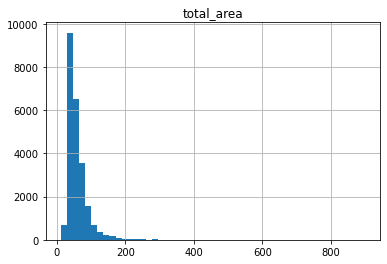

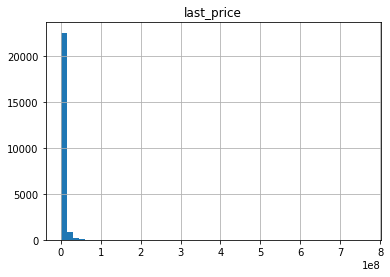

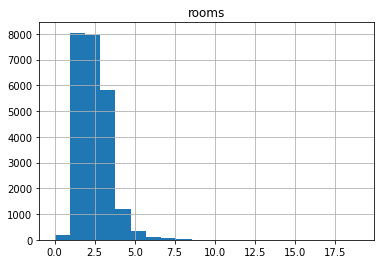

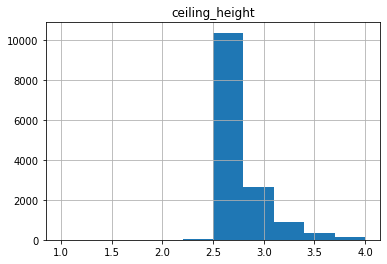

In [5]:
data.hist('total_area',bins=50) #
data.hist('last_price',bins=50) #
data.hist('rooms',bins=20) #
data.hist('ceiling_height',range = (1, 4)) # добавила диапазон оборажения высоты потолка

Площадь колеблется от 20 до 200 метров. Цена не превышает 5 млн. Количество комнат не превышает 7. Высота потолков не более 4 метров, самыая распространенная высота 2,5 м.

**2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


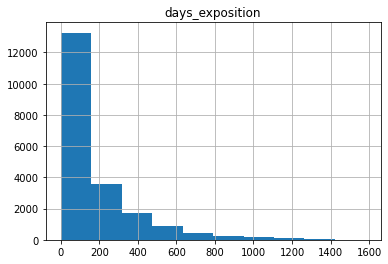

In [6]:
data.hist('days_exposition')
print(data['days_exposition'].describe())

Очень большое среднее отклонение, медианное и среднее значения отличаются практически в 2 раза. Повезло, если сделка по продаже закрыта быстрее, чем за 45 дней. Очень долгая продажа это более, чем 232 дня. 

**3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

count    2.091700e+04
mean     4.633430e+06
std      1.948351e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      9.999999e+06
Name: last_price, dtype: float64


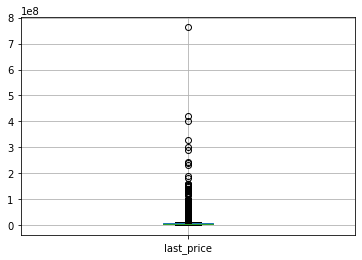

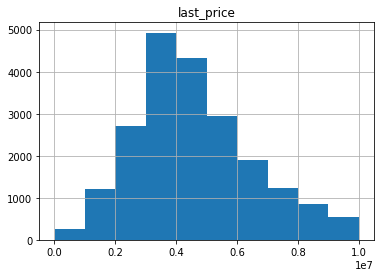

In [7]:
#Выбросы "Цена"
data.boxplot(column ='last_price') 

data_norm_price=data.query('last_price<10000000')
data_norm_price.hist('last_price')
print (data_norm_price['last_price'].describe())

Убираем квартиры больше 10 млн. Видим, что пик цены приходится на 3 млн.

count    20616.000000
mean        51.122884
std         16.110975
min         12.000000
25%         38.400000
50%         47.900000
75%         61.400000
max         99.900000
Name: total_area, dtype: float64


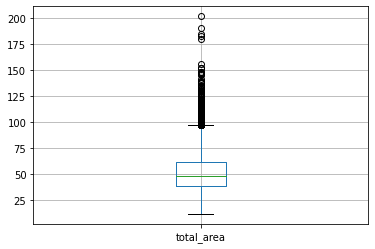

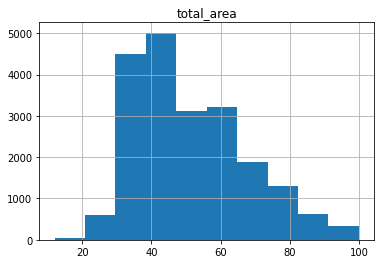

In [8]:
#Выбросы "Площадь"
data_norm_price.boxplot(column ='total_area') 

data_norm_area=data_norm_price.query('total_area<100')
data_norm_area.hist('total_area')
print(data_norm_area['total_area'].describe())

Посмотрим поближе на квартиры, не превышающиее 100 кв.м. Наибольшей популярностью пользуются квартиры до 50 кв.м.

<AxesSubplot:>

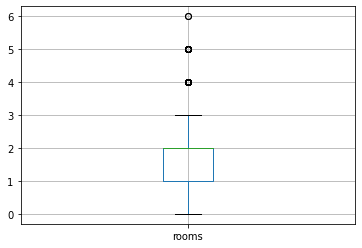

In [9]:
#Выбросы "число комнат"
data_norm_area.boxplot(column ='rooms') 


Единичные выбросы, никак не обрабатываю.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

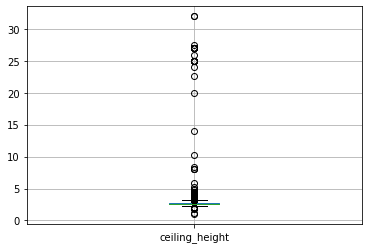

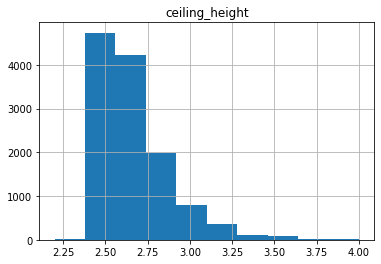

In [10]:
#Выбросы "высота потолков"
data_norm_area.boxplot(column ='ceiling_height') 
data_norm_height=data_norm_area.query('2<ceiling_height<=4')
data_norm_height.hist('ceiling_height')

Убрала варианты с высотой ниже 2 метров и больше 4. Больше всего предложение среди "хрущевок" - для них характерна высота потолков 2.5-2.75 м

count    9445.000000
mean      119.144733
std       109.046430
min         1.000000
25%        37.000000
50%        80.000000
75%       173.000000
max       450.000000
Name: days_exposition, dtype: float64


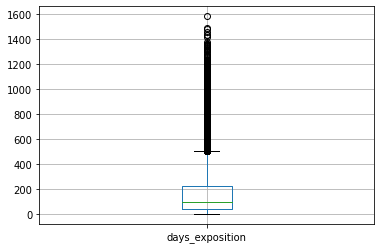

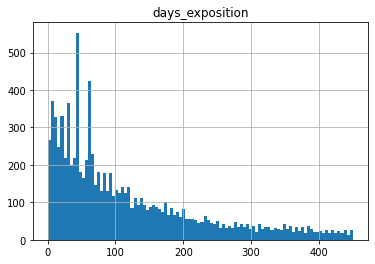

In [11]:
#Выборосы "Сколько дней разещено объявление"
data_norm_height.boxplot(column ='days_exposition') 

data_norm_exp=data_norm_height.query('days_exposition<=450')
data_norm_exp.hist('days_exposition',bins=100)
print(data_norm_exp['days_exposition'].describe())


Судя по "ящику с усами" выбросы начинаются после 450 дней продажи, это аномально долго, их отбросила. Гистограмма стала более плавной. Пик около нуля 



**4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

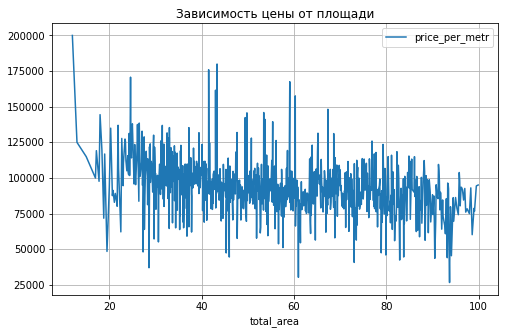

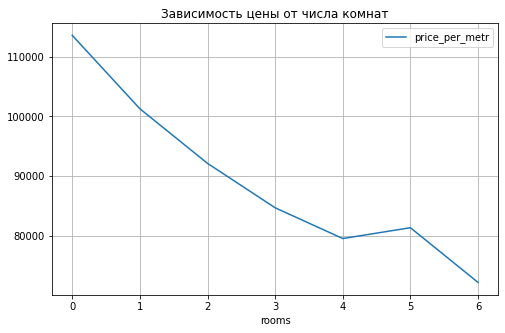

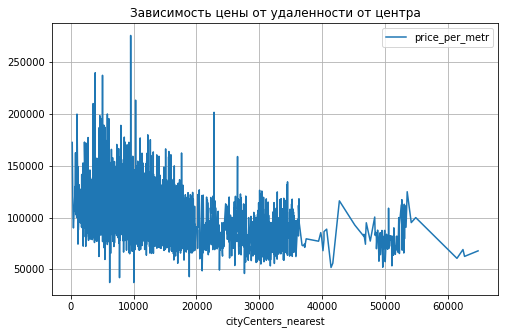

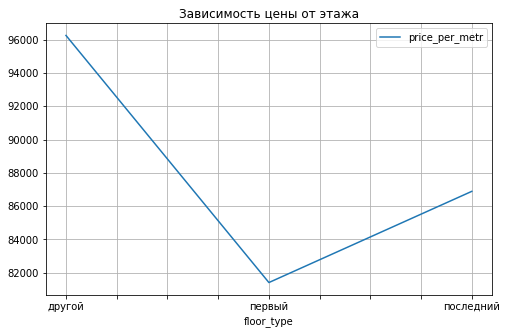

In [12]:
data_norm_exp.pivot_table(index='total_area', values='price_per_metr', aggfunc='median').plot(
    grid=True,title='Зависимость цены от площади', figsize=(8,5))
plt.show()
data_norm_exp.pivot_table(index='rooms', values='price_per_metr', aggfunc='median').plot(
    grid=True,title='Зависимость цены от числа комнат', figsize=(8,5))
plt.show()
data_norm_exp.pivot_table(index='cityCenters_nearest', values='price_per_metr', aggfunc='median').plot(
    grid=True,title='Зависимость цены от удаленности от центра', figsize=(8,5))
plt.show()
data_norm_exp.pivot_table(index='floor_type', values='price_per_metr', aggfunc='median').plot(
    grid=True,title='Зависимость цены от этажа', figsize=(8,5))
plt.show()



Разброс по цене за метр при площади до 100 кв.м не существенный и рост цен небольшой, т.е.  стоимость за квадратный метр квартир не сильно зависит от площади. То же самое могу сказать и про влияние количества комнат на цену – до 10 комнат оно несущественно. А вот расстояние на центр уже оказывает существенное влияение – чем ближе к центру, тем дороже.
Самые дешевые квартиры на первом этаже,  последний этаж тоже предпочитают меньше, чем любой другой.

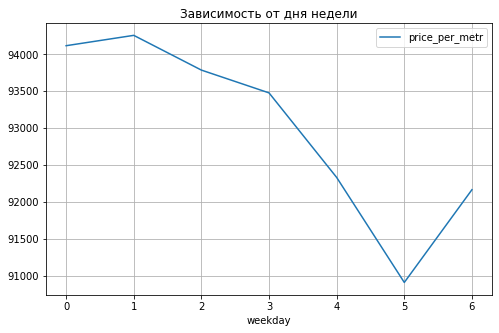

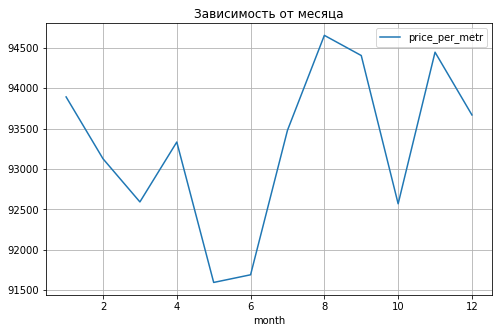

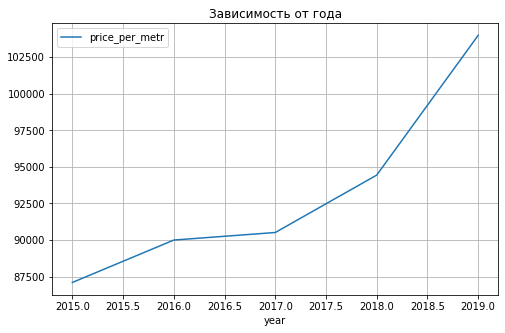

In [13]:
# Зависимости от даты размещения:
pd.set_option('chained_assignment', None)
data_norm_exp['weekday']=data_norm_exp['first_day_exposition'].dt.weekday
data_norm_exp.pivot_table(index='weekday', values='price_per_metr', aggfunc='median').plot(grid=True,title='Зависимость от дня недели', figsize=(8,5))
pd.set_option('chained_assignment', None)
plt.show()

data_norm_exp['month']=data_norm_exp['first_day_exposition'].dt.month
data_norm_exp.pivot_table(index='month', values='price_per_metr', aggfunc='median').plot(grid=True,title='Зависимость от месяца', figsize=(8,5))
plt.show()
data_norm_exp['year']=data_norm_exp['first_day_exposition'].dt.year
data_norm_exp.pivot_table(index='year', values='price_per_metr', aggfunc='median').plot(grid=True,title='Зависимость от года', figsize=(8,5))
plt.show()

Лучше всего продаются квартиры продаются в начале недели, дешевле всего – в субботу, также стоимость колеблется в течении года – выгоднее всего приобретать жилье в мае, пока все отдыхают по дачам. К сожалению, с каждым годом квартиры дорожают и темпы удорожания ускоряются.

**5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.**

In [14]:
#получение списка населенных пунктов с наибольшим числом объявлений:
towns=data_norm_exp['locality_name'].value_counts(ascending=False)
top_ten_towns=towns[:10]

data_top_towns=data_norm_exp.query('locality_name in @top_ten_towns.index').pivot_table(
    index='locality_name', values='price_per_metr', aggfunc='mean'
)
print(data_top_towns)
min_price=data_top_towns.min()
max_price=data_top_towns.max()
print()
print('Минимальная цена:')
print(data_top_towns.query('price_per_metr in @min_price'))
print()
print('Максимальная цена:')
print(data_top_towns.query('price_per_metr in @max_price'))

                   price_per_metr
locality_name                    
Всеволожск           65781.381616
Гатчина              70202.076785
Колпино              74816.376827
Петергоф             83171.530983
Пушкин               98254.362926
Санкт-Петербург     104194.990487
деревня Кудрово      91261.289390
посёлок Мурино       88042.488552
посёлок Парголово    89555.107282
посёлок Шушары       79063.850510

Минимальная цена:
               price_per_metr
locality_name                
Всеволожск       65781.381616

Максимальная цена:
                 price_per_metr
locality_name                  
Санкт-Петербург   104194.990487


Самое дорогое жилье в Санкт-Петербурге (104 тыс.руб за кв.м) и пригородах, дороже - в Питере, дешевле всего во Всеволожске 65,7 тыс. руб. за кв.м.

**6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

<AxesSubplot:title={'center':'Стоимость жилья, в зависимости от удаленности от центра'}, xlabel='city_center_km'>

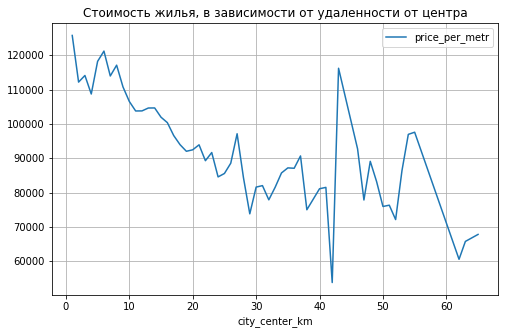

In [15]:
def m_to_km (value):
   # функция для пересчета метров в километры
    new_value=value/1000
    return np.ceil(new_value)
data_norm_exp['city_center_km']=data_norm_exp['cityCenters_nearest'].apply(m_to_km)


data_norm_exp.pivot_table(index='city_center_km', values='price_per_metr', aggfunc='mean').plot(
    grid=True,title='Стоимость жилья, в зависимости от удаленности от центра', figsize=(8,5))


Судя по графику, цена на жилье падает при удаленности от центра города более, чем на 8 км.

**7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

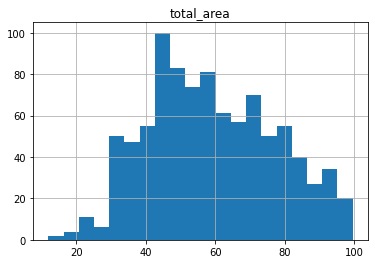

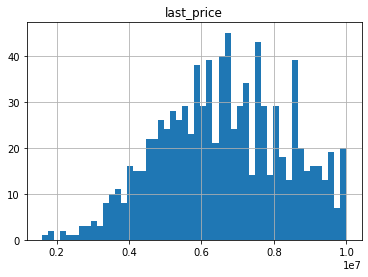

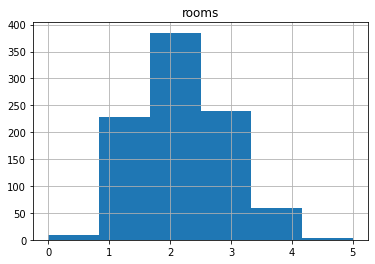

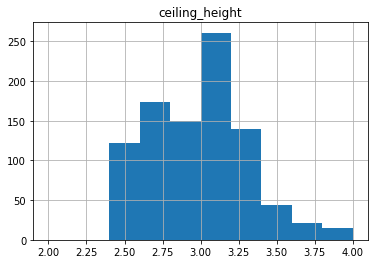

In [16]:
data_city_center=data_norm_exp.query('city_center_km<=8') # таблица с отсортированными данными для центра города.
data_city_center.hist('total_area',bins=20)
data_city_center.hist('last_price',bins=50)
data_city_center.hist('rooms',bins=6)
data_city_center.hist('ceiling_height',range = (2, 4))


Распределение для центра города схоже с распределением параметров по всему городу, но есть и отличия – например, меньше жилья с большой площадью, которые больше соответствуют загородным домам. Больше двух- и трехкомнатных квартир, потолки выше.

<AxesSubplot:title={'center':'Зависимость цены от площади'}, xlabel='total_area'>

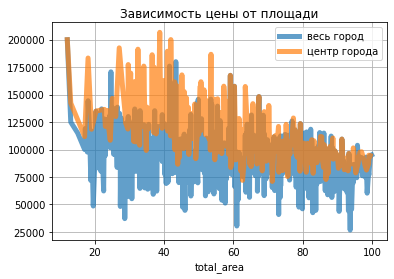

In [17]:
ax=data_norm_exp.pivot_table(index='total_area', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', linewidth=5,alpha=0.7,label='весь город')

data_city_center.pivot_table(index='total_area', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', title='Зависимость цены от площади',linewidth=5, alpha=0.7,label='центр города',ax=ax,grid=True,legend=True)


Разница между центром и отдаленными территориями несущественна - в центре просто дороже.

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

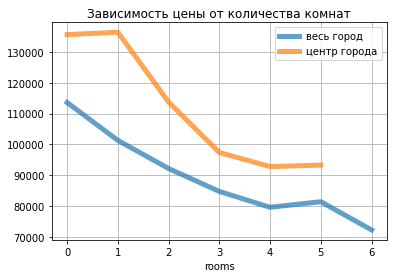

In [18]:
ax=data_norm_exp.pivot_table(index='rooms', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', linewidth=5,alpha=0.7,label='весь город')

data_city_center.pivot_table(index='rooms', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', title='Зависимость цены от количества комнат', linewidth=5, alpha=0.7,label='центр города',ax=ax,grid=True,legend=True)


Разницы также, кроме цены, нет.

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='floor_type'>

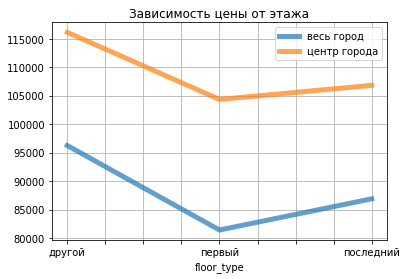

In [19]:
ax=data_norm_exp.pivot_table(index='floor_type', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', linewidth=5,alpha=0.7,label='весь город')

data_city_center.pivot_table(index='floor_type', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', title='Зависимость цены от этажа', linewidth=5, alpha=0.7,label='центр города',ax=ax,grid=True,legend=True)


Разницы также, кроме цены, нет.

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='city_center_km'>

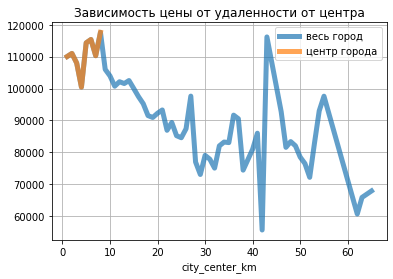

In [20]:
ax=data_norm_exp.pivot_table(index='city_center_km', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', linewidth=5,alpha=0.7,label='весь город')

data_city_center.pivot_table(index='city_center_km', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', title='Зависимость цены от удаленности от центра', linewidth=5, alpha=0.7,label='центр города',ax=ax,grid=True,legend=True)


<AxesSubplot:title={'center':'Зависимость цены от даты размещения'}, xlabel='first_day_exposition'>

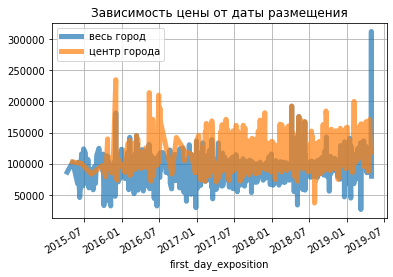

In [21]:
ax=data_norm_exp.pivot_table(index='first_day_exposition', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', linewidth=5,alpha=0.7,label='весь город')

data_city_center.pivot_table(index='first_day_exposition', values='price_per_metr', aggfunc='median').plot(
    y='price_per_metr', title='Зависимость цены от даты размещения', linewidth=5, alpha=0.7,label='центр города',ax=ax,grid=True,legend=True)


Разницы нет, нагляднее заметна разница в цене.

## Общий вывод

В ходе проведения анализа мы установили усредненный "портрет" продаваемой недвижимости:

Средняя площадь недвижимости - 50 кв.м
Cредняя цена помещения - 3 млн. руб
Количество комнат - 2,5
Высота потолка -  2,75 м


Среднее время продажи - 181 день.
Быстрой продажей можно назвать срок до 100 дней, а долгой более 500 дней
Факторы, влияющие на стоимость объекта:

На стоимость больше влияет общая площадь квартиры и в меньшей степени жилая площадь, площадь кухни и количествово комнат.
В среднем цена жилья на первом этаже дешевле, также последний этаж дешевле остальных.
А вот расстояние на центр уже оказывает существенное влияение – чем ближе к центру, тем дороже.
Активнее квартиры продаются в начале недели, дешевле всего – в субботу, также стоимость колеблется в течении года – выгоднее всего приобретать жилье в мае.

Самая высокая в Санкт-Петербурге - 104 195 рублей
Самая низкая во Всеволожске - 65 781 рубль
Стоимосость жилья в Санкт-Петербурге в зависимости от расстояния до центра города:

Чем жилье ближе к центру, тем цена выше и наоборот
Чем жилье дальше от центра, тем цена ниже.